In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 8

- 데이터 불러오기

In [2]:
train =  pd.read_csv("titanic_train (4).csv", index_col=0)

In [3]:
test = pd.read_csv("titanic_test (3).csv", index_col=0)
print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 탐색적분석

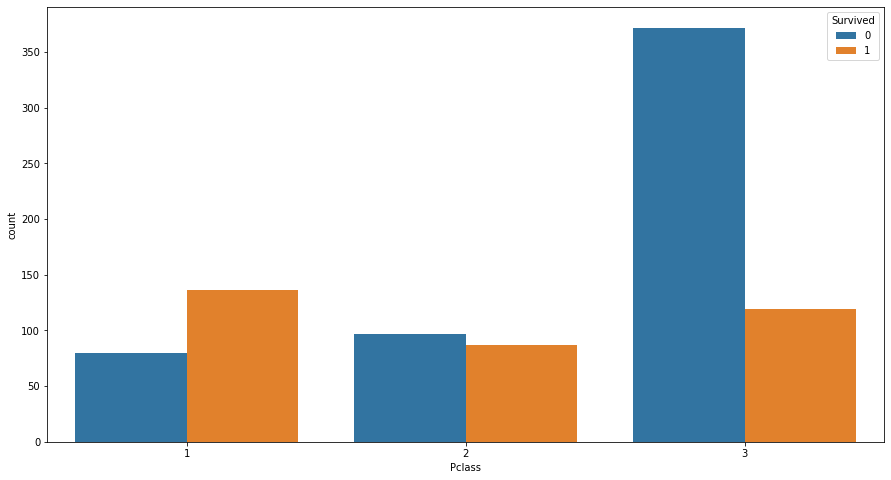

In [5]:
sns.countplot(data=train, x="Pclass", hue="Survived")

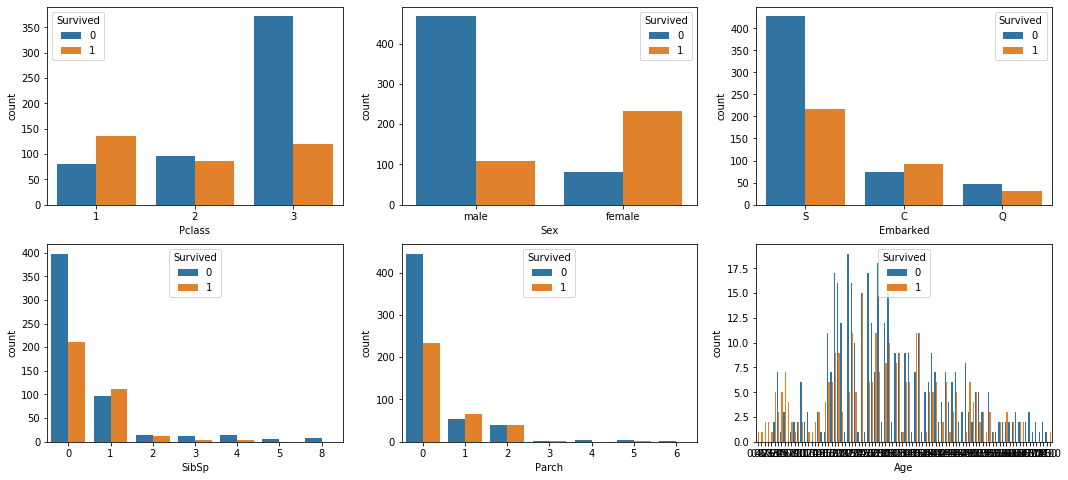

In [6]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.countplot(data=train, x="Pclass", hue="Survived", ax=ax1)
sns.countplot(data=train, x="Sex", hue="Survived", ax=ax2)
sns.countplot(data=train, x="Embarked", hue="Survived", ax=ax3)
sns.countplot(data=train, x="SibSp", hue="Survived", ax=ax4)
sns.countplot(data=train, x="Parch", hue="Survived", ax=ax5)
sns.countplot(data=train, x="Age", hue="Survived", ax=ax6)

plt.savefig('titanic.png', dpi=300)

### Q. 성별을 인코딩해주세요 남자-0 여자-1

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


## Fare의 결측치 채우기

In [8]:
mean_fare = train.Fare.mean()

In [9]:
test.loc[test.Fare.isnull(), 'Fare'] = mean_fare
test[test.Fare.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


In [10]:
test.loc[test.Sex == 'male', "Sex_encode"] = 0
test.loc[test.Sex == 'female', "Sex_encode"] = 1
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0


In [11]:
train.loc[train.Sex == 'male', "Sex_encode"] = 0
train.loc[train.Sex == 'female', "Sex_encode"] = 1
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


### One-Hot_Encoding

In [12]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

- get_dummies() - one-hot-encoding
- concat() :이어붙이기

In [13]:
embarked_t = pd.get_dummies(test.Embarked)
test = pd.concat([test, embarked_t], axis=1)
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,C,Q,S
PassengerId,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,0,1,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0,0,0,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,0,1,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0,0,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0,0,0,1


In [14]:
embarked = pd.get_dummies(train.Embarked)
embarked

,C,Q,S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
887,0,0,1
888,0,0,1
889,0,0,1


In [15]:
train = pd.concat([train,embarked], axis=1)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,C,Q,S
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,0,0,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,0,0,1


In [16]:
train.head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,C,Q,S
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,0,0,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,0,0,1
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0.0,0,1,0
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0.0,0,0,1
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0.0,0,0,1
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1.0,0,0,1


In [17]:
def find_title(name):
    return name.split(', ')[1].split('.')[0]

In [18]:
test['Title'] = test.Name.apply(find_title)

In [19]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,C,Q,S,Title
PassengerId,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,0,1,0,Mr
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0,0,0,1,Mrs
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,0,1,0,Mr
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0,0,0,1,Mr
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0,0,0,1,Mrs


In [20]:
train['Title'] =  train.Name.apply(find_title)

In [21]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,C,Q,S,Title
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0,0,1,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,1,0,0,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0,0,1,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,0,0,1,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,0,0,1,Mr


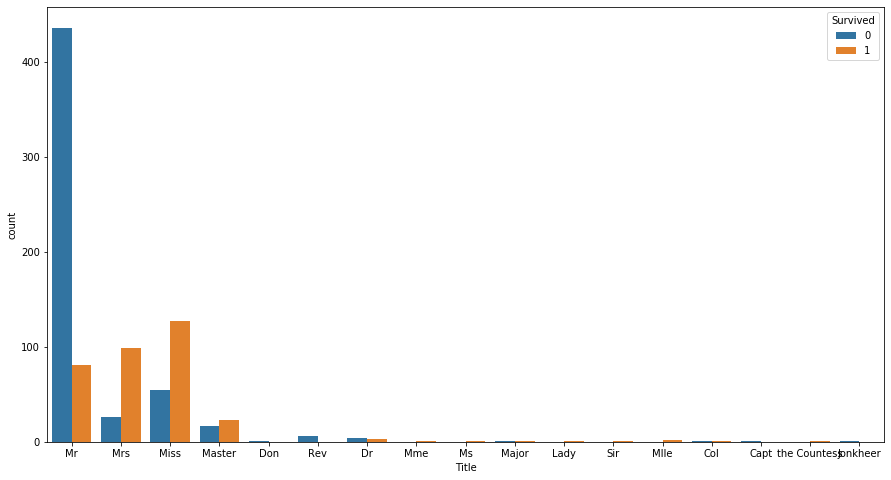

In [22]:
sns.countplot(data=train, x="Title", hue="Survived")

> **Q. Title를 one-hot-encoding하시되, train데이터프레임과 concat "Master"컬럼만 붙혀주세요**

In [23]:
test.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [24]:
title = pd.get_dummies(test.Title)
test = pd.concat([test, title.Master], axis=1)
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,C,Q,S,Title,Master
PassengerId,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,0,1,0,Mr,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0,0,0,1,Mrs,0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,0,1,0,Mr,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0,0,0,1,Mr,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0,0,0,1,Mrs,0


In [25]:
title = pd.get_dummies(train.Title)
train = pd.concat([train, title.Master], axis=1)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,C,Q,S,Title,Master
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0,0,1,Mr,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,1,0,0,Mrs,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0,0,1,Miss,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,0,0,1,Mrs,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,0,0,1,Mr,0


In [26]:
test.loc[test.Cabin.isnull(), 'Cabin_encode'] = 0
test.loc[test.Cabin.notnull(), 'Cabin_encode'] = 1

In [27]:
train.loc[train.Cabin.isnull(), 'Cabin_encode'] = 0
train.loc[train.Cabin.notnull(), 'Cabin_encode'] = 1

In [28]:
train.loc[train.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,C,Q,S,Title,Master,Cabin_encode
PassengerId,,,,,,,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1.0,0,0,0,Miss,0,1.0
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1.0,0,0,0,Mrs,0,1.0


In [29]:
train.Embarked.value_counts()/len(train) * 100

S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

In [30]:
train.Embarked.value_counts()/train.shape[0] * 100

S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

In [31]:
train.Embarked = train.Embarked.fillna('S')

In [32]:
train.loc[train.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,C,Q,S,Title,Master,Cabin_encode
PassengerId,,,,,,,,,,,,,,,,,,


### Age의 결측치

In [33]:
train.Age.isnull().sum() / len(train) * 100

19.865319865319865

In [34]:
train.Age.mean()

29.69911764705882

> **Q. Master의 평균과 Mr의 평균을 구해보세요**

In [35]:
train.loc[train.Title == "Mr", 'Age'].mean()

32.368090452261306

In [36]:
train.loc[train.Title == "Master", 'Age'].mean()

4.574166666666667

- 성별 나이의 평균

In [37]:
train.loc[train.Sex =='male', 'Age'].mean()

30.72664459161148

In [38]:
train.loc[train.Sex =='female', 'Age'].mean()

27.915708812260537

- 선실등급별 평균

In [39]:
train.loc[train.Pclass == 1, 'Age'].mean()

38.233440860215055

In [40]:
train.loc[train.Pclass == 2, 'Age'].mean()

29.87763005780347

In [41]:
train.loc[train.Pclass == 3, 'Age'].mean()

25.14061971830986

> **Q. 승객의 선실등급과 성별을 둘다 고려해서 분류하고 각각의 나이의 평균을 찾아보자. (1등석에 탑승한 남자의평균)**

In [42]:
train.loc[(train.Sex=='male')&(train.Pclass==1),'Age'].mean()

41.28138613861386

In [42]:
m1 = train.loc[(train.Sex=='male')&(train.Pclass==1),'Age'].mean()

In [43]:
train.loc[(train.Sex=='male')&(train.Pclass==2),'Age'].mean()

30.74070707070707

In [43]:
m2 = train.loc[(train.Sex=='male')&(train.Pclass==2),'Age'].mean()

In [44]:
train.loc[(train.Sex=='male')&(train.Pclass==3),'Age'].mean()

26.507588932806325

In [44]:
m3 = train.loc[(train.Sex=='male')&(train.Pclass==3),'Age'].mean()

In [45]:
train.loc[(train.Sex=='female')&(train.Pclass==1),'Age'].mean()

34.61176470588235

In [45]:
f1 = train.loc[(train.Sex=='female')&(train.Pclass==1),'Age'].mean()

In [46]:
train.loc[(train.Sex=='female')&(train.Pclass==2),'Age'].mean()

28.722972972972972

In [46]:
f2 = train.loc[(train.Sex=='female')&(train.Pclass==2),'Age'].mean()

In [47]:
train.loc[(train.Sex=='female')&(train.Pclass==3),'Age'].mean()

21.75

In [47]:
f3 = train.loc[(train.Sex=='female')&(train.Pclass==3),'Age'].mean()

> **Q. f1,f2,f3와 m1,m2,m3자료를 이용해서 Age의 결측치를 채워보자**

In [48]:
test.loc[(test.Age.isnull())&(test.Sex=='male')&(test.Pclass==1),'Age'] = m1
test.loc[(test.Age.isnull())&(test.Sex=='male')&(test.Pclass==2),'Age'] = m2
test.loc[(test.Age.isnull())&(test.Sex=='male')&(test.Pclass==3),'Age'] = m3
test.loc[(test.Age.isnull())&(test.Sex=='female')&(test.Pclass==1),'Age'] = f1
test.loc[(test.Age.isnull())&(test.Sex=='female')&(test.Pclass==2),'Age'] = f2
test.loc[(test.Age.isnull())&(test.Sex=='female')&(test.Pclass==3),'Age'] = f3

In [49]:
train.loc[(train.Age.isnull())&(train.Sex=='male')&(train.Pclass==1),'Age'] = m1
train.loc[(train.Age.isnull())&(train.Sex=='male')&(train.Pclass==2),'Age'] = m2
train.loc[(train.Age.isnull())&(train.Sex=='male')&(train.Pclass==3),'Age'] = m3
train.loc[(train.Age.isnull())&(train.Sex=='female')&(train.Pclass==1),'Age'] = f1
train.loc[(train.Age.isnull())&(train.Sex=='female')&(train.Pclass==2),'Age'] = f2
train.loc[(train.Age.isnull())&(train.Sex=='female')&(train.Pclass==3),'Age'] = f3

In [50]:
train.Age.isnull().sum()

0

In [51]:
train.isnull().sum()

Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          0
Sex_encode        0
C                 0
Q                 0
S                 0
Title             0
Master            0
Cabin_encode      0
dtype: int64

In [52]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Sex_encode', 'C', 'Q', 'S', 'Title',
       'Master', 'Cabin_encode'],
      dtype='object')

In [53]:
train = train.drop(['Name', 'Ticket'], axis=1)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_encode,C,Q,S,Title,Master,Cabin_encode
PassengerId,,,,,,,,,,,,,,,,
1,0,3,male,22.00,1,0,7.2500,NaN,S,0.0,0,0,1,Mr,0,0.0
2,1,1,female,38.00,1,0,71.2833,C85,C,1.0,1,0,0,Mrs,0,1.0
3,1,3,female,26.00,0,0,7.9250,NaN,S,1.0,0,0,1,Miss,0,0.0
4,1,1,female,35.00,1,0,53.1000,C123,S,1.0,0,0,1,Mrs,0,1.0
5,0,3,male,35.00,0,0,8.0500,NaN,S,0.0,0,0,1,Mr,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.00,0,0,13.0000,NaN,S,0.0,0,0,1,Rev,0,0.0
888,1,1,female,19.00,0,0,30.0000,B42,S,1.0,0,0,1,Miss,0,1.0
889,0,3,female,21.75,1,2,23.4500,NaN,S,1.0,0,0,1,Miss,0,0.0


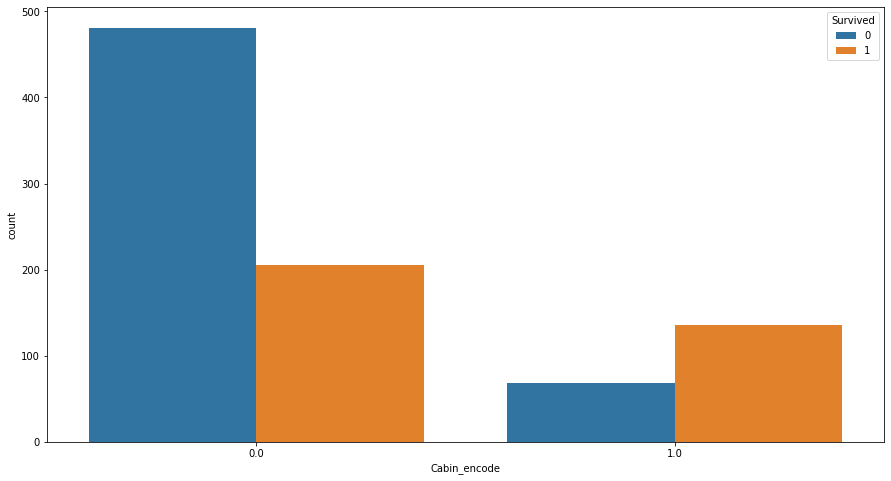

In [54]:
sns.countplot(data=train, x="Cabin_encode", hue="Survived")

> **Q. Family Size컬럼을 추가해주시고, alone컬럼도 추가해주세요**

In [55]:
test['FSize'] = test.SibSp + test.Parch

In [56]:
train['FSize'] = train.SibSp + train.Parch
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_encode,C,Q,S,Title,Master,Cabin_encode,FSize
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S,0.0,0,0,1,Mr,0,0.0,1
2,1,1,female,38.0,1,0,71.2833,C85,C,1.0,1,0,0,Mrs,0,1.0,1
3,1,3,female,26.0,0,0,7.9250,NaN,S,1.0,0,0,1,Miss,0,0.0,0
4,1,1,female,35.0,1,0,53.1000,C123,S,1.0,0,0,1,Mrs,0,1.0,1
5,0,3,male,35.0,0,0,8.0500,NaN,S,0.0,0,0,1,Mr,0,0.0,0


In [57]:
test.loc[test.FSize == 0, 'alone'] = 1
test.loc[test.FSize != 0, 'alone'] = 0

In [58]:
train.loc[train.FSize == 0, 'alone'] = 1
train.loc[train.FSize != 0, 'alone'] = 0

In [59]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,C,Q,S,Title,Master,Cabin_encode,FSize,alone
PassengerId,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,0,1,0,Mr,0,0.0,0,1.0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0,0,0,1,Mrs,0,0.0,1,0.0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,0,1,0,Mr,0,0.0,0,1.0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0,0,0,1,Mr,0,0.0,0,1.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0,0,0,1,Mrs,0,0.0,2,0.0


- 상관관계분석

In [60]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encode,C,Q,S,Master,Cabin_encode,FSize,alone
Survived,1.000000,-0.338481,-0.067485,-0.035322,0.081629,0.257307,0.543351,0.168240,0.003650,-0.155660,0.085221,0.316912,0.016639,-0.203367
Pclass,-0.338481,1.000000,-0.407015,0.083081,0.018443,-0.549500,-0.131900,-0.243292,0.221009,0.081720,0.082081,-0.725541,0.065997,0.135207
Age,-0.067485,-0.407015,1.000000,-0.251313,-0.180705,0.118308,-0.112851,0.041504,-0.084069,0.008690,-0.368335,0.271987,-0.262041,0.183628
SibSp,-0.035322,0.083081,-0.251313,1.000000,0.414838,0.159651,0.114631,-0.059528,-0.026354,0.070941,0.349559,-0.040460,0.890712,-0.584471
Parch,0.081629,0.018443,-0.180705,0.414838,1.000000,0.216225,0.245489,-0.011069,-0.081228,0.063036,0.267344,0.036987,0.783111,-0.583398
Fare,0.257307,-0.549500,0.118308,0.159651,0.216225,1.000000,0.182333,0.269335,-0.117216,-0.166603,0.010908,0.482075,0.217138,-0.271832
Sex_encode,0.543351,-0.131900,-0.112851,0.114631,0.245489,0.182333,1.000000,0.082853,0.074115,-0.125722,-0.159934,0.140391,0.200988,-0.303646
C,0.168240,-0.243292,0.041504,-0.059528,-0.011069,0.269335,0.082853,1.000000,-0.148258,-0.778359,-0.035225,0.208528,-0.046215,-0.095298
Q,0.003650,0.221009,-0.084069,-0.026354,-0.081228,-0.117216,0.074115,-0.148258,1.000000,-0.496624,0.010478,-0.129572,-0.058592,0.086464
S,-0.155660,0.081720,0.008690,0.070941,0.063036,-0.166603,-0.125722,-0.778359,-0.496624,1.000000,0.025291,-0.110087,0.079977,0.024929


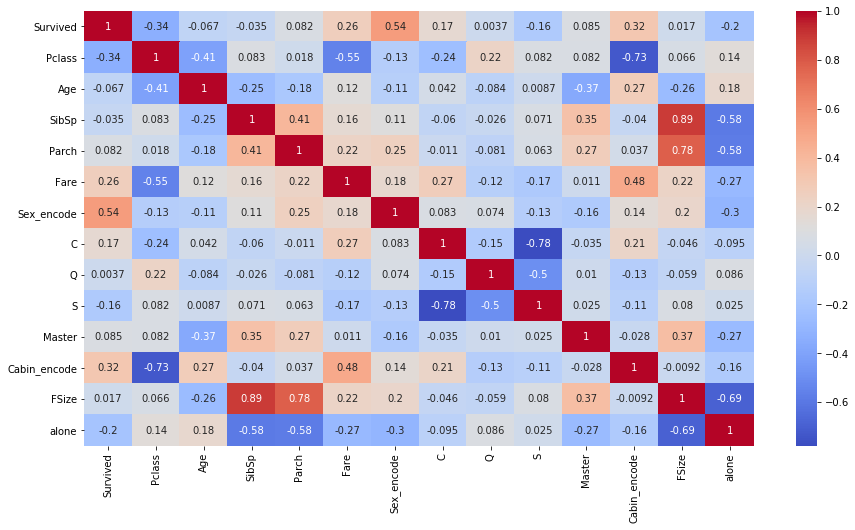

In [61]:
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')

In [62]:
train.loc[train.Cabin_encode==1,'Pclass'].value_counts()

1    176
2     16
3     12
Name: Pclass, dtype: int64

### 예측모형만들기

In [63]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'Sex_encode', 'C', 'Q', 'S', 'Title', 'Master',
       'Cabin_encode', 'FSize', 'alone'],
      dtype='object')

In [64]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Sex_encode', 'C', 'Q', 'S', 'Title', 'Master',
       'Cabin_encode', 'FSize', 'alone'],
      dtype='object')

In [65]:
X = ["Pclass", "Sex_encode", "Fare", "C", "Q", "S","Master", 
     "Cabin_encode", "alone" ]

In [66]:
y = "Survived"

In [67]:
X_train = train[X]
print(X_train.shape)
X_train.head()

(891, 9)


,Pclass,Sex_encode,Fare,C,Q,S,Master,Cabin_encode,alone
PassengerId,,,,,,,,,
1,3,0.0,7.2500,0,0,1,0,0.0,0.0
2,1,1.0,71.2833,1,0,0,0,1.0,0.0
3,3,1.0,7.9250,0,0,1,0,0.0,1.0
4,1,1.0,53.1000,0,0,1,0,1.0,0.0
5,3,0.0,8.0500,0,0,1,0,0.0,1.0


In [68]:
X_test = test[X]
print(X_test.shape)
X_test.head()

(418, 9)


,Pclass,Sex_encode,Fare,C,Q,S,Master,Cabin_encode,alone
PassengerId,,,,,,,,,
892,3,0.0,7.8292,0,1,0,0,0.0,1.0
893,3,1.0,7.0000,0,0,1,0,0.0,0.0
894,2,0.0,9.6875,0,1,0,0,0.0,1.0
895,3,0.0,8.6625,0,0,1,0,0.0,1.0
896,3,1.0,12.2875,0,0,1,0,0.0,0.0


In [69]:
y_train = train[y]

In [70]:
X_train.head()

,Pclass,Sex_encode,Fare,C,Q,S,Master,Cabin_encode,alone
PassengerId,,,,,,,,,
1,3,0.0,7.2500,0,0,1,0,0.0,0.0
2,1,1.0,71.2833,1,0,0,0,1.0,0.0
3,3,1.0,7.9250,0,0,1,0,0.0,1.0
4,1,1.0,53.1000,0,0,1,0,1.0,0.0
5,3,0.0,8.0500,0,0,1,0,0.0,1.0


In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

### 하이퍼파라미터튜닝 자동화코드
- Grid Search max_depth  = [3, 6, 9, 12, 15]
- Random Search numpy.random.randint(3,12)

## Grid Search

In [72]:
from sklearn.model_selection import cross_val_score

n_estimators = 100

max_depth_list = [6,9,12,15,18,21,24]
max_features_list = [0.6, 0.7, 0.8, 0.9, 1.0]

hyperparameters = []
for max_depth in max_depth_list:
    for max_features in max_features_list:
        model = RandomForestClassifier(n_estimators = n_estimators,
                                     max_depth = max_depth,
                                     max_features = max_features,
                                     random_state=31,
                                     n_jobs=-1)
        
        score = cross_val_score(model, X_train, y_train, cv=10).mean()
        
        hyperparameters.append({"score": score,
                               "max_depth": max_depth,
                               "max_features": max_features})
        
        print("현재 스코어는 {0:.5f}".format(score))
        
hyperparameters

In [75]:
hyper = pd.DataFrame.from_dict(hyperparameters)
hyper.sort_values(by="score", ascending=False)

,score,max_depth,max_features
10,0.845156,7,0.952843
2,0.845156,7,0.969212
6,0.845156,7,0.898856
16,0.842896,9,0.977672
13,0.842896,9,0.983352
8,0.840649,7,0.877151
3,0.840649,7,0.856802
7,0.840649,7,0.831527
0,0.839526,8,0.850707
19,0.839526,8,0.831939


## Radom Search

In [ ]:
np.random.randint(0.1, 1.0)

In [ ]:
np.random.uniform(0.1,1.0)

In [74]:
from sklearn.model_selection import cross_val_score

n_estimators = 100

num_epoch = 20

hyperparameters = []

for epoch in range(num_epoch):
    max_depth = np.random.randint(5,10)
    max_features = np.random.uniform(0.8, 1.0)
    
    model = RandomForestClassifier(n_estimators = n_estimators,
                                     max_depth = max_depth,
                                     max_features = max_features,
                                     random_state=31,
                                     n_jobs=-1)
        
    score = cross_val_score(model, X_train, y_train, cv=10).mean()
        
    hyperparameters.append({"score": score,
                               "max_depth": max_depth,
                               "max_features": max_features})
        
    print("현재 스코어는 {0:.5f}".format(score))
        
hyperparameters

현재 스코어는 0.83953
현재 스코어는 0.83396
현재 스코어는 0.84516
현재 스코어는 0.84065
현재 스코어는 0.83396
현재 스코어는 0.83396
현재 스코어는 0.84516
현재 스코어는 0.84065
현재 스코어는 0.84065
현재 스코어는 0.83727
현재 스코어는 0.84516
현재 스코어는 0.83840
현재 스코어는 0.83508
현재 스코어는 0.84290
현재 스코어는 0.83508
현재 스코어는 0.83727
현재 스코어는 0.84290
현재 스코어는 0.83396
현재 스코어는 0.83059
현재 스코어는 0.83953


[{'score': 0.8395255930087391,
  'max_depth': 8,
  'max_features': 0.8507065379646305},
 {'score': 0.8339575530586766,
  'max_depth': 6,
  'max_features': 0.8933561434497659},
 {'score': 0.8451560549313358,
  'max_depth': 7,
  'max_features': 0.9692116270409961},
 {'score': 0.840649188514357,
  'max_depth': 7,
  'max_features': 0.8568023755764425},
 {'score': 0.8339575530586766,
  'max_depth': 6,
  'max_features': 0.9665704653716096},
 {'score': 0.8339575530586766,
  'max_depth': 6,
  'max_features': 0.9992941676406308},
 {'score': 0.8451560549313358,
  'max_depth': 7,
  'max_features': 0.8988562222625657},
 {'score': 0.840649188514357,
  'max_depth': 7,
  'max_features': 0.8315265023659792},
 {'score': 0.840649188514357,
  'max_depth': 7,
  'max_features': 0.8771506108320875},
 {'score': 0.8372659176029963,
  'max_depth': 9,
  'max_features': 0.8388825035033688},
 {'score': 0.8451560549313358,
  'max_depth': 7,
  'max_features': 0.9528434394043525},
 {'score': 0.8384019975031212,
  'm

In [ ]:
#model = DecisionTreeClassifier(max_depth=7, random_state=31)

In [77]:
model = RandomForestClassifier(n_estimators = 3000,
                              max_depth =7,
                              max_features = 1.0,
                              random_state=31,
                              n_jobs=-1)

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
cross_val_score(model, X_train, y_train, cv =10 ).mean()

0.844019975031211

In [80]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3000,
                       n_jobs=-1, oob_score=False, random_state=31, verbose=0,
                       warm_start=False)

In [81]:
prediction = model.predict(X_test)

### 제출/

In [82]:
submission = pd.read_csv("gender_submission.csv", index_col=0)
submission.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [83]:
submission.Survived = prediction

In [84]:
submission.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [85]:
submission.to_csv("My_second_Submission.csv")